In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm_notebook

In [3]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [4]:
data=pd.read_csv('tutorial/chapter11/demo/tmp/all_gzdata.csv',dtype={'fullURLId':str})

/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head()

,realIP,realAreacode,userAgent,userOS,userID,clientID,timestamp,timestamp_format,pagePath,ymd,...,fullURLId,hostname,pageTitle,pageTitleCategoryId,pageTitleCategoryName,pageTitleKw,fullReferrer,fullReferrerURL,organicKeyword,source
0,2683657840,140100,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Windows XP,7.850222e+08,7.850222e+08,1.422973e+12,2015-02-03 22:21:08,/info/hunyin/hunyinfagui/201404102884290_6.html,20150203.0,...,107001,www.lawtime.cn,广东省人口与计划生育条例全文2014 - 法律快车婚姻法,31.0,故意伤害,计划生育,NaN,NaN,NaN,NaN
1,973705742,140100,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows 7,2.048327e+09,2.048327e+09,1.422973e+12,2015-02-03 22:21:08,/ask/exp/17199.html,20150203.0,...,1999001,www.lawtime.cn,非广州户籍人员可以在广州申请出入境证件吗？ - 法律快车法律经验,20.0,劳资纠纷,出入境,baidu,http://www.baidu.com/s?wd=%E9%9D%9E%E5%B9%BF%E...,非广州户籍人员怎么申请预约出入境,baidu
2,3104681075,140100,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Windows XP,1.639802e+09,1.639802e+09,1.422973e+12,2015-02-03 22:21:17,/ask/question_3893276.html,20150203.0,...,101003,www.lawtime.cn,汽车碰撞自行车或两轮摩托车精确碰撞点的确定方法 - 法律快车法律咨询,26.0,定罪量刑,法律咨询,www.haosou.com/s,http://www.haosou.com/s?psid=e79d0155bed18bf4b...,NaN,www.haosou.com
3,308351962,140106,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Windows XP,1.597051e+09,1.597051e+09,1.422973e+12,2015-02-03 22:21:22,/ask/question_5281741.html,20150203.0,...,101003,www.lawtime.cn,交通事故销案后不满意赔偿可以重新立案吗 - 法律快车法律咨询,12.0,伤害赔偿,法律咨询,baidu,http://www.baidu.com/s?word=%E4%BA%A4%E9%80%9A...,交通事故赔偿后交警要销案吗,baidu
4,2683657840,140100,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Windows XP,7.850222e+08,7.850222e+08,1.422973e+12,2015-02-03 22:21:30,/info/hunyin/hunyinfagui/201404102884290_5.html,20150203.0,...,107001,www.lawtime.cn,广东省人口与计划生育条例全文2014 - 法律快车婚姻法,31.0,故意伤害,计划生育,NaN,NaN,NaN,NaN


In [6]:
counts = data['fullURLId'].value_counts()

In [7]:
counts = counts.reset_index()

In [8]:
counts.columns=['id','num']

In [9]:
counts

,id,num
0,101003,396612
1,1999001,201426
2,107001,182900
3,301001,18430
4,102002,12021
5,101002,7776
6,101001,5603
7,106001,3957
8,102001,2129
9,103003,1526


In [10]:
counts['type']=counts.id.str.extract('(\d{3})')

In [11]:
counts_=counts[['type','num']].groupby('type').sum()

In [12]:
counts_.sort_values(by='num',ascending=False,inplace=True)

In [13]:
counts_

,num
type,
101,411665
199,201426
107,182900
301,18430
102,17357
106,3957
103,1715


In [14]:
counts_['ratio'] = counts_['num']/sum(counts_['num'])

In [15]:
counts_ = counts_.reset_index()

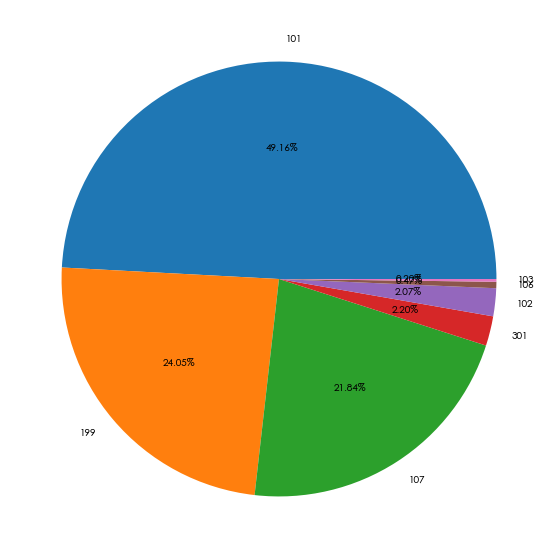

In [16]:
plt.pie(counts_["num"],autopct='%1.2f%%',labels=counts_['type'])
plt.show()

In [17]:
counts_

,type,num,ratio
0,101,411665,0.491570
1,199,201426,0.240523
2,107,182900,0.218401
3,301,18430,0.022007
4,102,17357,0.020726
5,106,3957,0.004725
6,103,1715,0.002048


In [18]:
url_107 = data['fullURL'][data['fullURLId'].notna()&data['fullURLId'].str.startswith("107")]

In [19]:
url_107=pd.DataFrame(url_107)

In [20]:
url_107.reset_index(drop=True)

,fullURL
0,http://www.lawtime.cn/info/hunyin/hunyinfagui/...
1,http://www.lawtime.cn/info/hunyin/hunyinfagui/...
2,http://www.lawtime.cn/info/laodong/zhiyebing/2...
3,http://www.lawtime.cn/info/hunyin/lhlawlhxy/20...
4,http://www.lawtime.cn/info/zhaiquan/zhaiquangu...
...,...
182895,http://www.lawtime.cn/info/minshi/fagui/201401...
182896,http://www.lawtime.cn/info/shengchan/aqzs/2008...
182897,http://www.lawtime.cn/info/minshi/fagui/201401...
182898,http://www.lawtime.cn/info/hunyin/znfylaw/


In [21]:
url_107['type']=None

In [22]:
url_107['type'][url_107.fullURL.str.contains('info/.+?/')]='知识首页'
url_107['type'][url_107.fullURL.str.contains('info/.+?/.+?')]='知识列表页'
url_107['type'][url_107.fullURL.str.contains('/\d+?_*\d+?\.html')]='知识内容页'

In [23]:
url_107.groupby('type').count()

,fullURL
type,
知识内容页,164243
知识列表页,9656
知识首页,9001


In [24]:
question_url_ids = data['fullURLId'][data['fullURL'].notna()&data['fullURL'].str.contains('\?')] 

In [25]:
qcounts = question_url_ids.value_counts()

In [26]:
qcounts = pd.DataFrame(qcounts)

In [27]:
qcounts

,fullURLId
1999001,64718
301001,356
107001,346
101003,47
102002,25


In [28]:
qcounts['pct']=qcounts['fullURLId']/sum(qcounts['fullURLId'])*100

In [29]:
qcounts

,fullURLId,pct
1999001,64718,98.818176
301001,356,0.543578
107001,346,0.528309
101003,47,0.071764
102002,25,0.038173


In [30]:
ip_counts = data['realIP'].value_counts()

In [31]:
ip_counts = pd.DataFrame(ip_counts)

In [32]:
ip_counts.reset_index(drop=True)

,realIP
0,23483
1,21211
2,20229
3,19307
4,2175
...,...
262390,1
262391,1
262392,1
262393,1


In [33]:
clicks=ip_counts['realIP'].value_counts()

In [34]:
more_than_seven = sum(clicks.iloc[7:])

In [35]:
more_than_seven

13240

In [36]:
clicks_pct = list(clicks.iloc[:7])+[more_than_seven]

In [37]:
clicks_pct = clicks / sum(clicks) * 100

In [38]:
clicks_pct

1      60.186741
2      18.892890
3       6.996703
4       4.077059
5       2.256903
         ...    
362     0.000381
108     0.000381
118     0.000381
121     0.000381
766     0.000381
Name: realIP, Length: 306, dtype: float64

In [39]:
data_107 = data[data['fullURLId'].notna() & data['fullURLId'].str.startswith('107') & data['fullURL'].str.contains('hunyin')]

In [40]:
info = data_107[['realIP','fullURL']].copy()

In [41]:
info.iloc[np.random.randint(0,len(data_107)-1,1)[0]].fullURL

'http://www.lawtime.cn/info/hunyin/jihuashengyu/201411053308990_2.html'

In [42]:
info['fullURL'] = info.fullURL.apply(lambda x : re.sub('\?.*','',x))

In [43]:
len(info)

34516

In [44]:
info1 = info[info.fullURL.str.contains('\.html')].copy()

In [45]:
info1['fullURL']=info1['fullURL'].apply(lambda x : re.sub('_\d+\.html','.html',x))

In [46]:
len(info1)

31199

In [47]:
info2 = info1.drop_duplicates()

In [48]:
len(info1)

31199

In [49]:
info1['realIP']=info1.realIP.apply(lambda x : str(x))

In [50]:
IP_counts = info1['realIP'].value_counts()

In [51]:
IP = list(IP_counts.index)

In [52]:
counts = list(IP_counts.values)

In [53]:
IP_counts = pd.DataFrame({'IP':IP,'counts':counts})

In [54]:
IP_counts = IP_counts[IP_counts.counts > 2]

In [55]:
ip_train,ip_test=train_test_split(IP_counts.IP,test_size=0.2)

In [56]:
ip_idx_train = [ip in list(ip_train) for ip in info1.realIP]
ip_idx_test = [ip in list(ip_test) for ip in info1.realIP]

In [57]:
data_train = info1.loc[ip_idx_train,:]

In [58]:
data_test = info1.loc[ip_idx_test,:]

In [59]:
data_ip_train = data_train.iloc[:,0]
data_url_train = data_train.iloc[:,1]
IP_tr = list(set(data_ip_train))
url_tr = list(set(data_url_train))

In [60]:
len(data_url_train),len(url_tr)

(17754, 2746)

In [61]:
len(data_ip_train),len(IP_tr)

(17754, 2768)

In [62]:
data_ip_test = data_test.iloc[:,0]
data_url_test = data_test.iloc[:,1]

In [63]:
UI_matrix_tr = pd.DataFrame(0,index=IP_tr,columns=url_tr)

In [64]:
for i in data_train.index:
    UI_matrix_tr.loc[data_train.loc[i,'realIP'],data_train.loc[i,'fullURL']]=1

In [65]:
sum(UI_matrix_tr.sum(axis=1))

7401

In [72]:
Item_matrix_tr = pd.DataFrame(0,index=url_tr,columns=url_tr)

In [ ]:
for i in tqdm_notebook(Item_matrix_tr.index):
    for j in Item_matrix_tr.index:
        a = sum(UI_matrix_tr.loc[:,[i,j]].sum(axis=1)==2)
        b = sum(UI_matrix_tr.loc[:,[i,j]].sum(axis=1)!=0)
        Item_matrix_tr.loc[i,j] = a/b